#Importing Data

**Dataset Downloaded From Kaggle**

In [3]:
import pandas as pd
df=pd.read_csv("retail_data.csv")

print(df.head())

   Transaction ID        Date Customer ID  Gender   Age Product Category  \
0               1  24-11-2023     CUST001    Male  34.0           Beauty   
1               2  27-02-2023     CUST002  Female  26.0         Clothing   
2               3  13-01-2023     CUST003    Male  50.0      Electronics   
3               4  21-05-2023     CUST004    Male  37.0         Clothing   
4               5  06-05-2023     CUST005    Male  30.0           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1000 non-null   int64  
 1   Date              1000 non-null   object 
 2   Customer ID       997 non-null    object 
 3   Gender            997 non-null    object 
 4   Age               996 non-null    float64
 5   Product Category  997 non-null    object 
 6   Quantity          1000 non-null   int64  
 7   Price per Unit    1000 non-null   int64  
 8   Total Amount      1000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB
None


In [5]:
print(df.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  996.000000  1000.000000     1000.000000   1000.000000
mean       500.500000   41.390562     2.514000      179.890000    456.000000
std        288.819436   13.688166     1.132734      189.681356    559.997632
min          1.000000   18.000000     1.000000       25.000000     25.000000
25%        250.750000   29.000000     1.000000       30.000000     60.000000
50%        500.500000   42.000000     3.000000       50.000000    135.000000
75%        750.250000   53.000000     4.000000      300.000000    900.000000
max       1000.000000   64.000000     4.000000      500.000000   2000.000000


#Count the missing Values

In [6]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         3
Gender              3
Age                 4
Product Category    3
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


#Treat Numeric Missing Value Coloumns

In [7]:
df['Age']=df['Age'].fillna(df['Age'].mean())


In [8]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         3
Gender              3
Age                 0
Product Category    3
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


#Treat Non-Numeric Missing value Coloumns

In [9]:
df['Customer ID']=df['Customer ID'].fillna('Unknown')
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Product Category']=df['Product Category'].fillna(df['Product Category'].mode()[0])

print("\nAfter filling missing values:")
print(df.isnull().sum())


After filling missing values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


#Treating Duplicate Values

In [10]:
df=df.drop_duplicates()

#Check for Outliers

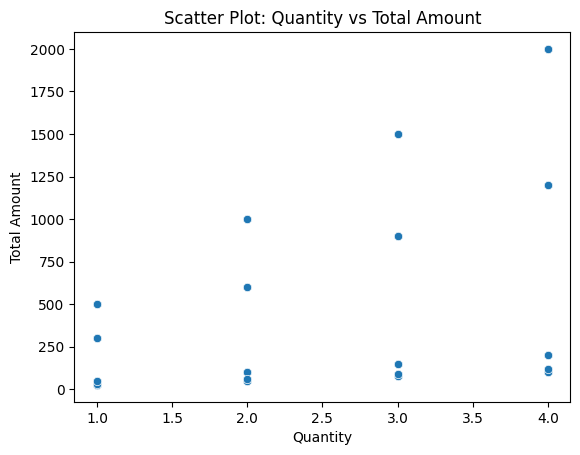

In [11]:
sns.scatterplot(x=df['Quantity'], y=df['Total Amount'])
plt.title('Scatter Plot: Quantity vs Total Amount')
plt.show()

#20 Visualisations

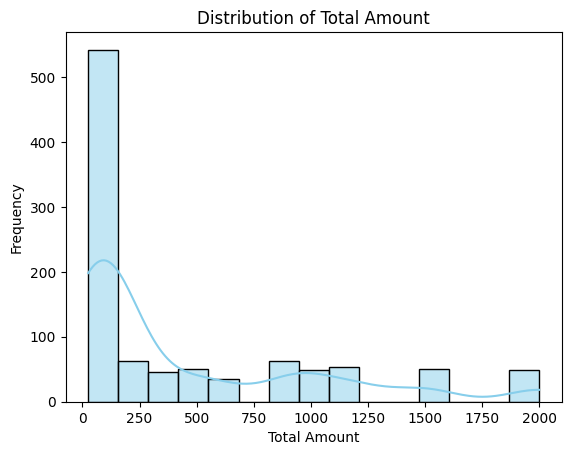

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Total Amount'],bins=15, color='skyblue',kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

<ipython-input-13-53b782e04df3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product Category', y='Total Amount', palette='muted')


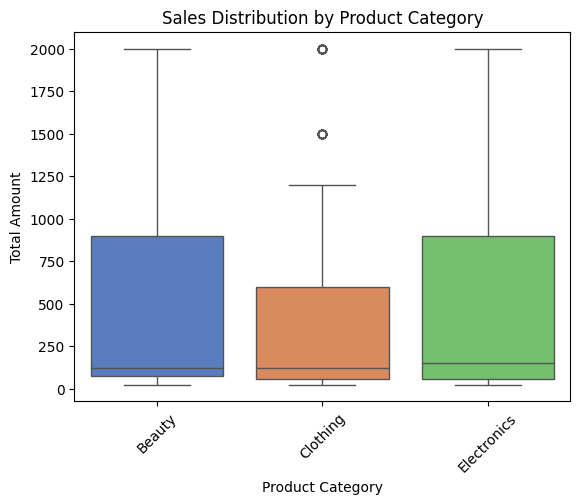

In [13]:
sns.boxplot(data=df, x='Product Category', y='Total Amount', palette='muted')
plt.title('Sales Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()

<ipython-input-14-def622d1591d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Total Amount', palette='coolwarm')


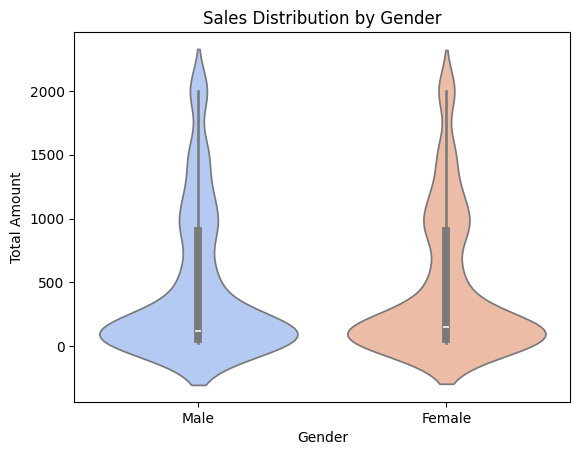

In [14]:
sns.violinplot(data=df, x='Gender', y='Total Amount', palette='coolwarm')
plt.title('Sales Distribution by Gender')
plt.show()

In [33]:
gender_counts = df['Gender'].value_counts()
gender_counts

,count
Gender,
Female,512
Male,488


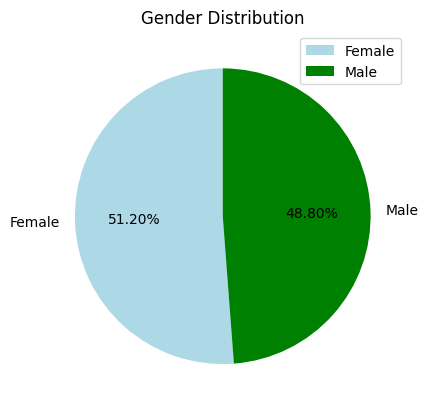

In [39]:
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.2f%%', colors=['lightblue', 'green'], startangle=90, legend=True)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

In [40]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '24-11-2023'

**Corrected Date Coloumn Format**

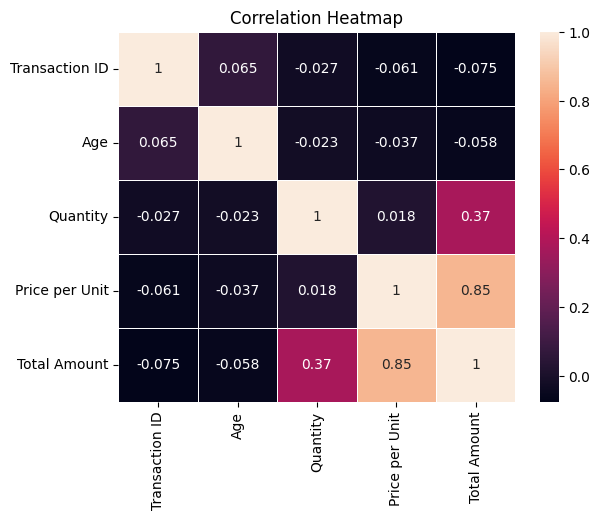

In [41]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

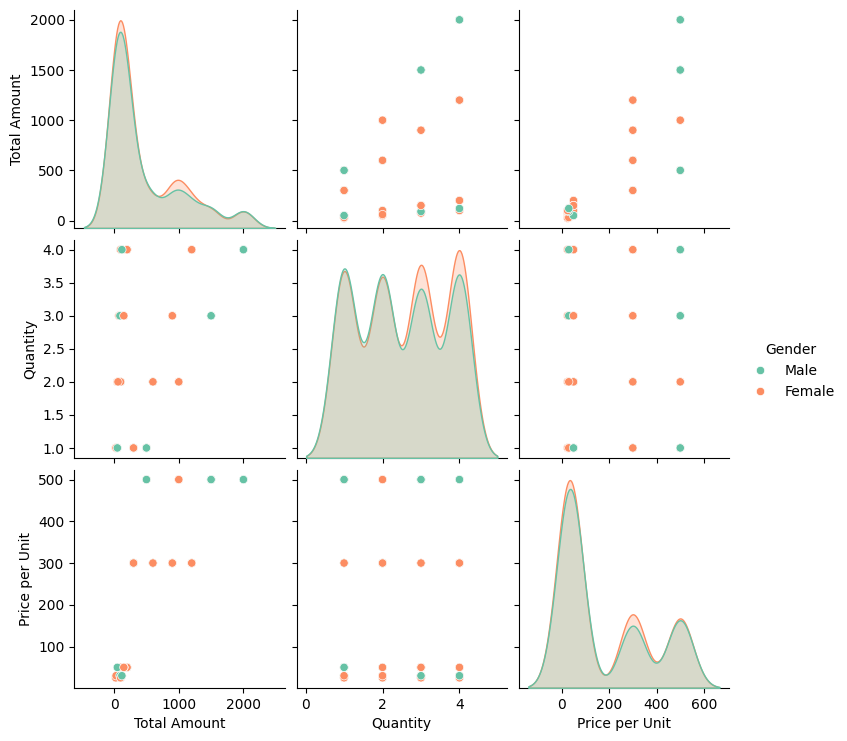

In [42]:
sns.pairplot(df[['Total Amount', 'Quantity', 'Price per Unit', 'Gender']], hue='Gender', palette='Set2')
plt.show()

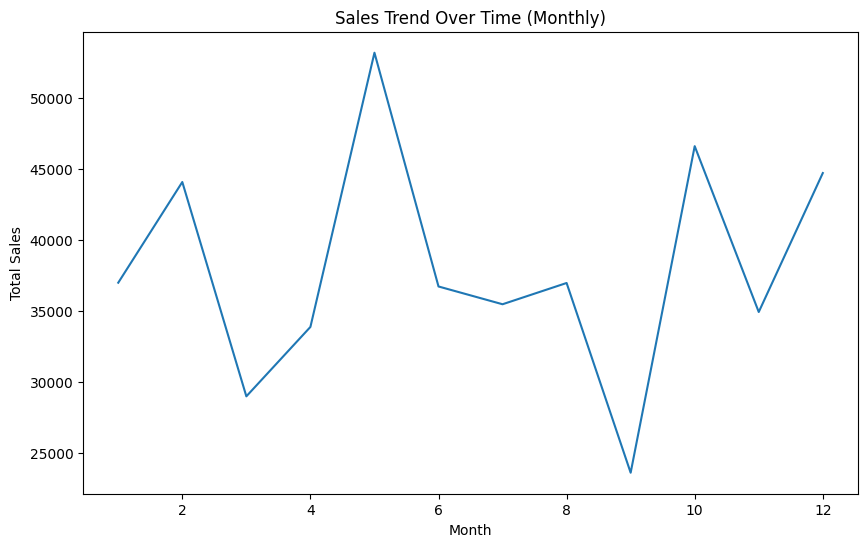

In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df.groupby(df['Date'].dt.month)['Total Amount'].sum().plot(kind='line', figsize=(10, 6))
plt.title('Sales Trend Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

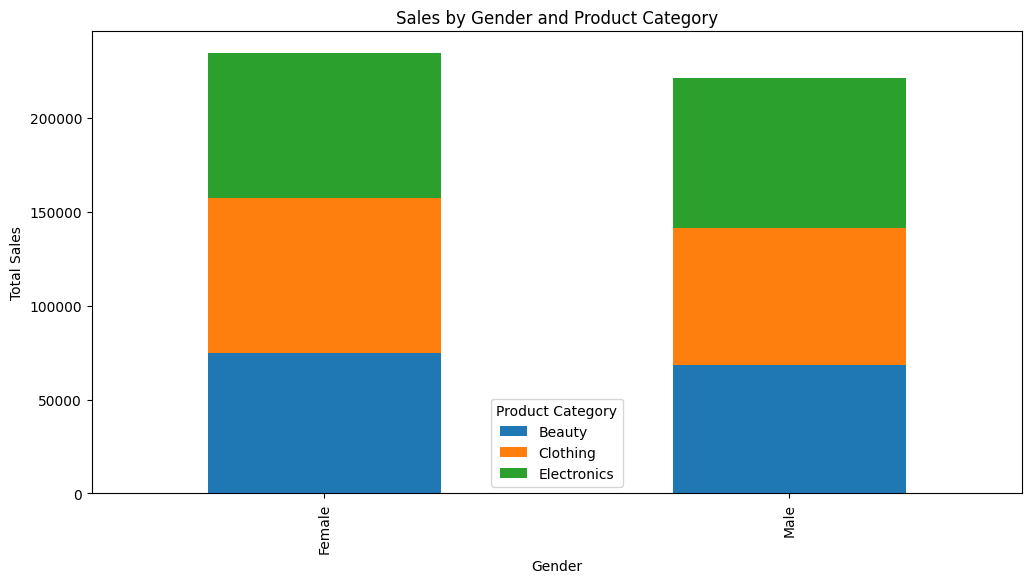

In [45]:
sales_by_gender_category = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()
sales_by_gender_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sales by Gender and Product Category')
plt.ylabel('Total Sales')
# plt.xticks(rotation=45)
plt.show()

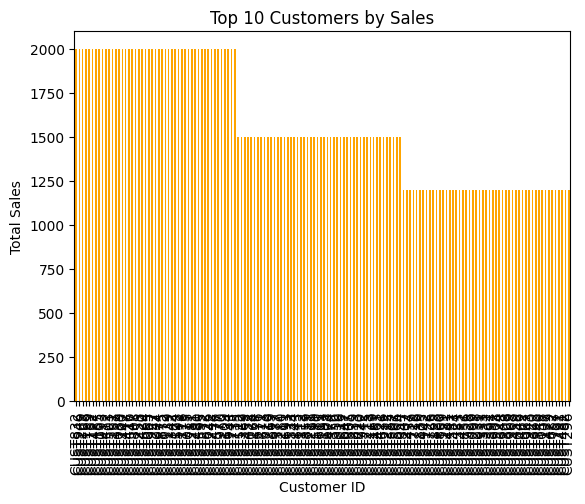

In [48]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(150)
top_customers.plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Sales')
plt.ylabel('Total Sales')
plt.show()

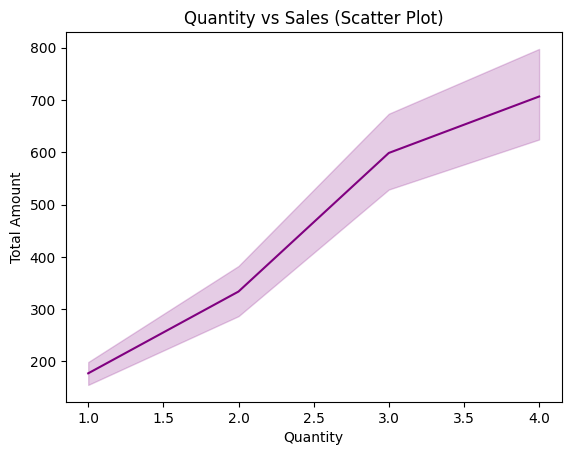

In [50]:
sns.lineplot(data=df, x='Quantity', y='Total Amount', color='purple')
plt.title('Quantity vs Sales (Scatter Plot)')
plt.show()

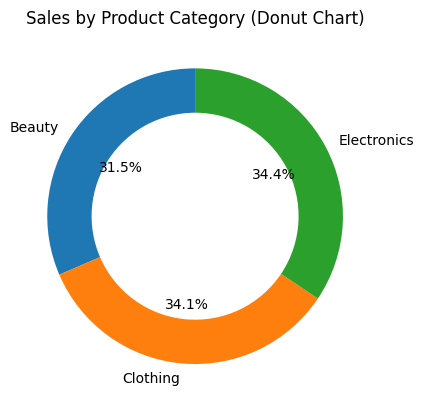

In [51]:
category_sales = df.groupby('Product Category')['Total Amount'].sum()
category_sales.plot(kind='pie', wedgeprops={'width': 0.3}, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Product Category (Donut Chart)')
plt.ylabel('')
plt.show()

In [52]:
import plotly.express as px

fig = px.treemap(df, path=['Product Category'], values='Total Amount', color='Product Category',
                  color_continuous_scale='Viridis', title='Sales by Product Category')
fig.show()

<ipython-input-53-e733dc4292ba>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




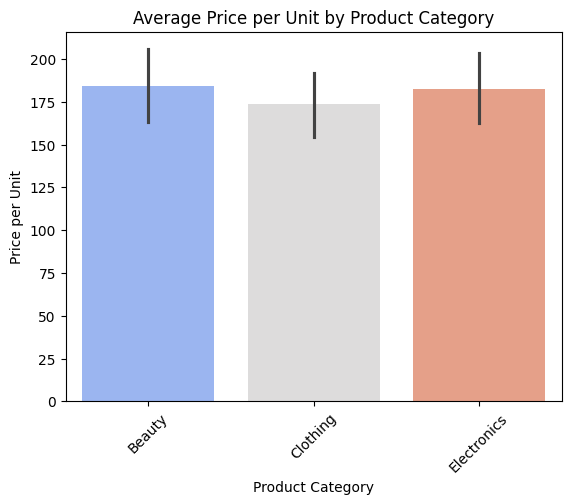

In [53]:
sns.barplot(data=df, x='Product Category', y='Price per Unit', estimator='mean', palette='coolwarm')
plt.title('Average Price per Unit by Product Category')
plt.xticks(rotation=45)
plt.show()

<ipython-input-54-ce8496656af6>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




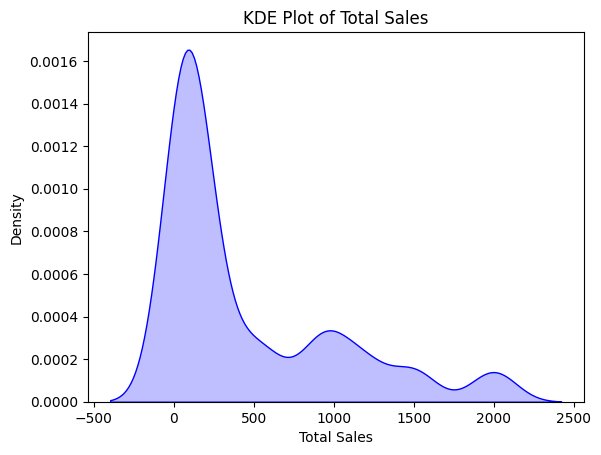

In [54]:
sns.kdeplot(df['Total Amount'], shade=True, color='blue')
plt.title('KDE Plot of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Density')
plt.show()

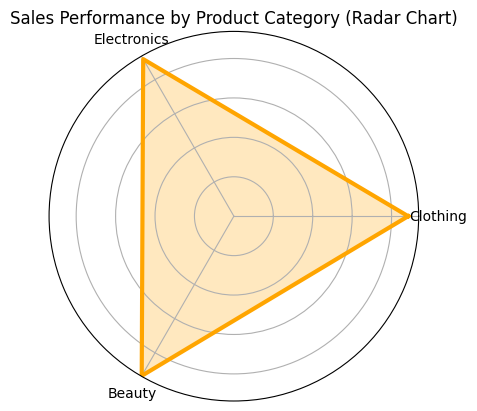

In [55]:
import numpy as np
category_sales_avg = df.groupby('Product Category')['Total Amount'].mean().sort_values()

categories = category_sales_avg.index
values = category_sales_avg.values

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color='orange', alpha=0.25)
ax.plot(angles, values, color='orange', linewidth=3)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Sales Performance by Product Category (Radar Chart)')
plt.show()

In [ ]:
sns.scatterplot(data=df, x='Quantity', y='Total Amount', size='Price per Unit', hue='Product Category',
                sizes=(20, 200), alpha=0.6, palette='Set2')
plt.title('Bubble Chart: Sales vs Quantity vs Price per Unit')
plt.show()

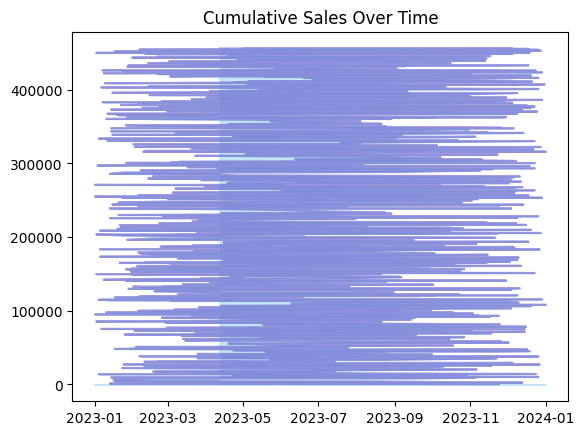

In [56]:
df['Cumulative Sales'] = df['Total Amount'].cumsum()
plt.fill_between(df['Date'], df['Cumulative Sales'], color='skyblue', alpha=0.5)
plt.plot(df['Date'], df['Cumulative Sales'], color='Slateblue', alpha=0.6)
plt.title('Cumulative Sales Over Time')
plt.show()

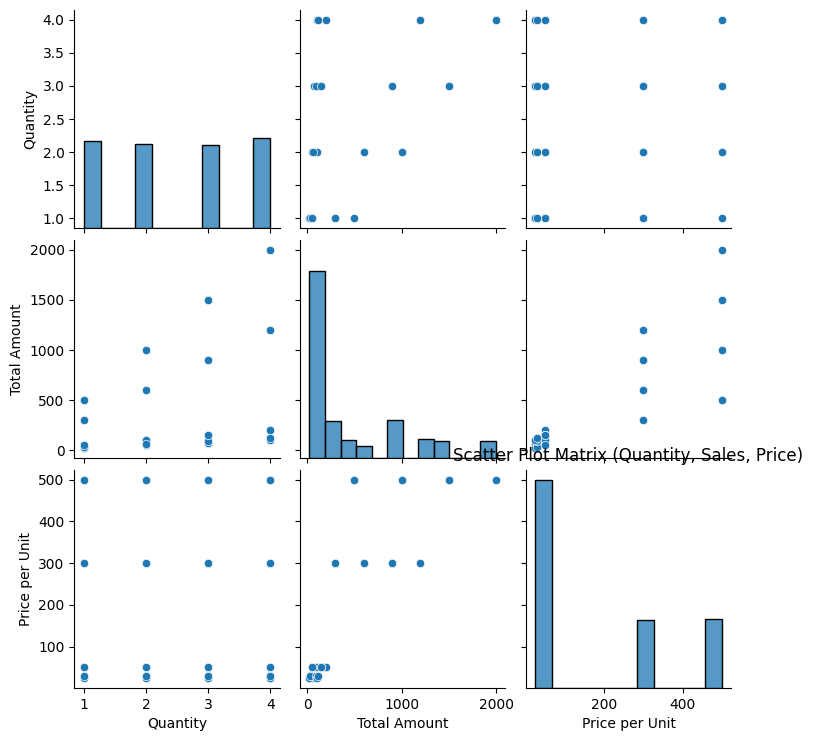

In [57]:
sns.pairplot(df[['Quantity', 'Total Amount', 'Price per Unit']])
plt.title('Scatter Plot Matrix (Quantity, Sales, Price)')
plt.show()

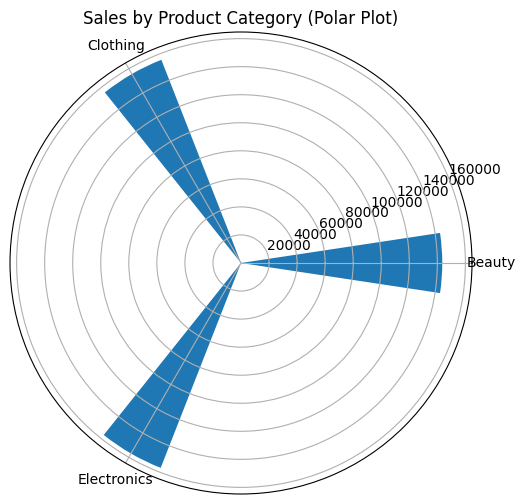

In [58]:
category_sales = df.groupby('Product Category')['Total Amount'].sum()
angles = np.linspace(0, 2 * np.pi, len(category_sales), endpoint=False)
values = category_sales.values

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.bar(angles, values, width=0.3, bottom=0.0)
ax.set_xticks(angles)
ax.set_xticklabels(category_sales.index)
plt.title('Sales by Product Category (Polar Plot)')
plt.show()

<ipython-input-59-f9b837972e84>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




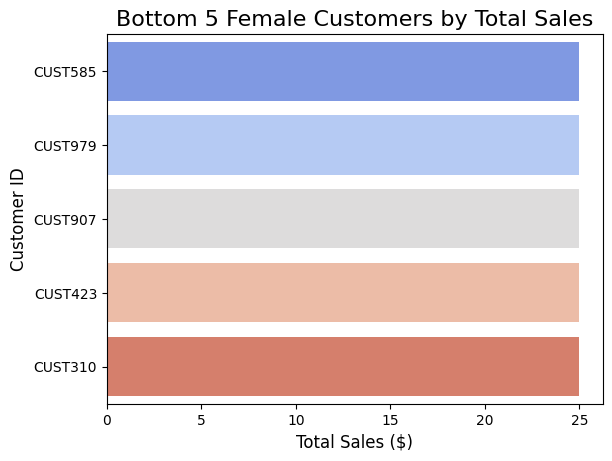

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

female_customers = df[df['Gender'] == 'Female']

bottom_female_customers = female_customers.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=True).head(5)

sns.barplot(x=bottom_female_customers.values, y=bottom_female_customers.index, palette='coolwarm')

plt.title('Bottom 5 Female Customers by Total Sales', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)

plt.show()